In [2]:
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'

In [3]:
# The bleu of each individual for each generation
bleu = {
    '1': [0.244, 0.25, 0.206, 0.238, 0.245, 0.241, 0.231, 0.235],
    '2': [0.217, 0.245, 0.244, 0.241, 0.23, 0.245, 0.222, 0.241],
    '3': [0.206, 0.245, 0.244, 0.231, 0.206, 0.241, 0.244, 0.241],
    '4': [0.241, 0.249, 0.244, 0.224, 0.238, 0.244, 0.244, 0.241],
    '5': [0.249, 0.244, 0.244, 0.229, 0.223, 0.244, 0.24, 0.241],
    '6': [0.249, 0.232, 0.229, 0.244, 0.249, 0.24, 0.259, 0.244],
    '7': [0.259, 0.249, 0.248, 0.259, 0.244, 0.223, 0.249, 0.24],
    '8': [0.259, 0.244, 0.249, 0.249, 0.23, 0.259, 0.247, 0.249],
    '9': [0.259, 0.217, 0.248, 0.249, 0.248, 0.24, 0.24, 0.249],
    '10': [0.259, 0.25, 0.249, 0.221, 0.244, 0.223, 0.229, 0.207],
    '11': [0.259, 0.208, 0.249, 0.244, 0.244, 0.232, 0.221, 0.261],
    '12': [0.261, 0.251, 0.249, 0.244, 0.208, 0.244, 0.226, 0.244],
    '13': [0.261, 0.251, 0.249, 0.244, 0.212, 0.231, 0.231, 0.244],
    '14': [0.261, 0.251, 0.207, 0.231, 0.208, 0.237, 0.249, 0.249],
    '15': [0.261, 0.251, 0.207, 0.221, 0.254, 0.221, 0.249, 0.241]
}

# The individuals in each generation
individuals = {
    'g1': {
        '1': [0.0086, 0.47, 0.0002, 6],
        '2': [0.0086, 0.53, 0.0002, 6],
        '3': [0.0082, 0.48, 0.0001, 13],
        '4': [0.0083, 0.47, 0.0002, 13],
        '5': [0.0086, 0.53, 0.0002, 10],
        '6': [0.0086, 0.47, 0.0002, 6],
        '7': [0.0076, 0.47, 0.0001, 8],
        '8': [0.0087, 0.48, 0.0002, 8],
    },
    'g2': {
        '1': [0.0086, 0.53, 0.0003, 6],
        '2': [0.0087, 0.53, 0.0002, 10],
        '3': [0.0086, 0.51, 0.0002, 6],
        '4': [0.0086, 0.42, 0.0002, 6],
        '5': [0.0086, 0.53, 0.0002, 11],
        '6': [0.0086, 0.58, 0.0002, 10],
        '7': [0.0086, 0.47, 0.0003, 6],
        '8': [0.0086, 0.47, 0.0002, 6]
    },
    'g3': {
        '1': [0.0087, 0.53, 0.0002, 14],
        '2': [0.0085, 0.58, 0.0002, 10],
        '3': [0.0086, 0.5, 0.0002, 6],
        '4': [0.0086, 0.42, 0.0002, 7],
        '5': [0.0086, 0.58, 0.0002, 14],
        '6': [0.008, 0.53, 0.0002, 10],
        '7': [0.0088, 0.42, 0.0002, 6],
        '8': [0.0086, 0.56, 0.0002, 6]
    },
    'g4': {
        '1': [0.008, 0.58, 0.0002, 10],
        '2': [0.0086, 0.5, 0.0003, 6],
        '3': [0.0088, 0.42, 0.0002, 6],
        '4': [0.008, 0.53, 0.0003, 10],
        '5': [0.0086, 0.5, 0.0003, 10],
        '6': [0.0085, 0.55, 0.0002, 6],
        '7': [0.0086, 0.53, 0.0002, 6],
        '8': [0.0083, 0.42, 0.0002, 10]
    },
    'g5': {
        '1': [0.0087, 0.5, 0.0003, 6],
        '2': [0.0088, 0.41, 0.0002, 6],
        '3': [0.0089, 0.55, 0.0002, 6],
        '4': [0.0086, 0.53, 0.0002, 11],
        '5': [0.0088, 0.42, 0.0004, 6],
        '6': [0.0086, 0.48, 0.0002, 6],
        '7': [0.0086, 0.53, 0.0002, 10],
        '8': [0.0085, 0.55, 0.0002, 10]
    },
    'g6': {
        '1': [0.0087, 0.49, 0.0003, 6],
        '2': [0.0088, 0.41, 0.0002, 9],
        '3': [0.0089, 0.55, 0.0002, 11],
        '4': [0.0086, 0.46, 0.0002, 6],
        '5': [0.0088, 0.45, 0.0003, 6],
        '6': [0.0087, 0.5, 0.0002, 10],
        '7': [0.008, 0.48, 0.0002, 6],
        '8': [0.0094, 0.55, 0.0002, 6]
    },
    'g7': {
        '1': [0.008, 0.49, 0.0002, 6],
        '2': [0.0087, 0.53, 0.0003, 6],
        '3': [0.0084, 0.45, 0.0003, 6],
        '4': [0.0079, 0.46, 0.0002, 6],
        '5': [0.0087, 0.49, 0.0002, 6],
        '6': [0.0074, 0.48, 0.0003, 6],
        '7': [0.0086, 0.5, 0.0003, 6],
        '8': [0.0088, 0.45, 0.0002, 10]
    },
    'g8': {
        '1': [0.008, 0.45, 0.0002, 6],
        '2': [0.0085, 0.46, 0.0002, 6],
        '3': [0.0087, 0.58, 0.0003, 6],
        '4': [0.0086, 0.5, 0.0003, 6],
        '5': [0.0079, 0.46, 0.0003, 6],
        '6': [0.0075, 0.49, 0.0002, 6],
        '7': [0.0086, 0.5, 0.0003, 8],
        '8': [0.0087, 0.56, 0.0003, 6]
    },
    'g9': {
        '1': [0.008, 0.44, 0.0002, 6],
        '2': [0.0075, 0.49, 0.0002, 10],
        '3': [0.0079, 0.58, 0.0003, 6],
        '4': [0.009, 0.5, 0.0003, 6],
        '5': [0.0075, 0.49, 0.0003, 6],
        '6': [0.008, 0.45, 0.0002, 8],
        '7': [0.0086, 0.5, 0.0003, 6],
        '8': [0.0087, 0.56, 0.0003, 6]
    },
    'g10': {
        '1': [0.008, 0.48, 0.0002, 6],
        '2': [0.009, 0.5, 0.0003, 10],
        '3': [0.0087, 0.57, 0.0003, 6],
        '4': [0.0079, 0.58, 0.0004, 6],
        '5': [0.0093, 0.5, 0.0002, 6],
        '6': [0.0072, 0.44, 0.0003, 6],
        '7': [0.0079, 0.58, 0.0004, 6],
        '8': [0.0087, 0.56, 0.0004, 6]
    },
    'g11': {
        '1': [0.008, 0.47, 0.0002, 6],
        '2': [0.009, 0.5, 0.0003, 11],
        '3': [0.009, 0.57, 0.0003, 6],
        '4': [0.0093, 0.54, 0.0002, 6],
        '5': [0.009, 0.49, 0.0002, 6],
        '6': [0.0074, 0.48, 0.0003, 10],
        '7': [0.01, 0.5, 0.0003, 6],
        '8': [0.0087, 0.57, 0.0002, 6]
    },
    'g12': {
        '1': [0.0087, 0.57, 0.0002, 6],
        '2': [0.008, 0.47, 0.0003, 6],
        '3': [0.009, 0.61, 0.0003, 6],
        '4': [0.0086, 0.54, 0.0002, 6],
        '5': [0.008, 0.47, 0.0002, 10],
        '6': [0.009, 0.57, 0.0002, 6],
        '7': [0.0093, 0.54, 0.0003, 6],
        '8': [0.009, 0.53, 0.0002, 6]
    },
    'g13': {
        '1': [0.0091, 0.57, 0.0002, 6],
        '2': [0.008, 0.48, 0.0003, 6],
        '3': [0.009, 0.63, 0.0003, 6],
        '4': [0.0087, 0.54, 0.0002, 6],
        '5': [0.008, 0.47, 0.0002, 8],
        '6': [0.0093, 0.57, 0.0003, 6],
        '7': [0.0086, 0.54, 0.0003, 9],
        '8': [0.009, 0.57, 0.0002, 6]
    },
    'g14': {
        '1': [0.009, 0.57, 0.0002, 6],
        '2': [0.008, 0.44, 0.0003, 6],
        '3': [0.009, 0.63, 0.0004, 6],
        '4': [0.0087, 0.54, 0.0003, 6],
        '5': [0.008, 0.48, 0.0002, 10],
        '6': [0.0091, 0.57, 0.0003, 8],
        '7': [0.0088, 0.54, 0.0003, 6],
        '8': [0.009, 0.63, 0.0003, 6]
    },
    'g15': {
        '1': [0.009, 0.58, 0.0002, 6],
        '2': [0.008, 0.42, 0.0003, 6],
        '3': [0.0088, 0.54, 0.0004, 6],
        '4': [0.0097, 0.63, 0.0003, 6],
        '5': [0.008, 0.44, 0.0002, 6],
        '6': [0.009, 0.57, 0.0003, 6],
        '7': [0.009, 0.65, 0.0003, 6],
        '8': [0.0088, 0.54, 0.0003, 7]
    }
}

# The features in each generation and all individuals
features = {
    'lr': {
        '1': [0.0086, 0.0086, 0.0082, 0.0083, 0.0086, 0.0086, 0.0076, 0.0087],
        '2': [0.0086, 0.0087, 0.0086, 0.0086, 0.0086, 0.0086, 0.0086, 0.0086],
        '3': [0.0087, 0.0085, 0.0086, 0.0086, 0.0086, 0.008, 0.0088, 0.0086],
        '4': [0.008, 0.0086, 0.0088, 0.008, 0.0086, 0.0085, 0.0086, 0.0083],
        '5': [0.0087, 0.0088, 0.0089, 0.0086, 0.0088, 0.0086, 0.0086, 0.0085],
        '6': [0.0087, 0.0088, 0.0089, 0.0086, 0.0088, 0.0087, 0.008, 0.0094],
        '7': [0.008, 0.0087, 0.0084, 0.0079, 0.0087, 0.0074, 0.0086, 0.0088],
        '8': [0.008, 0.0085, 0.0087, 0.0086, 0.0079, 0.0075, 0.0086, 0.0087],
        '9': [0.008, 0.0075, 0.0079, 0.009, 0.0075, 0.008, 0.0086, 0.0087],
        '10': [0.008, 0.009, 0.0087, 0.0079, 0.0093, 0.0072, 0.0079, 0.0087],
        '11': [0.008, 0.009, 0.009, 0.0093, 0.009, 0.0074, 0.01, 0.0087],
        '12': [0.0087, 0.008, 0.009, 0.0086, 0.008, 0.009, 0.0093, 0.009],
        '13': [0.0091, 0.008, 0.009, 0.0087, 0.008, 0.0093, 0.0086, 0.009],
        '14': [0.009, 0.008, 0.009, 0.0087, 0.008, 0.0091, 0.0088, 0.009],
        '15': [0.009, 0.008, 0.0088, 0.0097, 0.008, 0.009, 0.009, 0.0088]
    },
    'lr_decay': {
        '1': [0.47, 0.53, 0.48, 0.47, 0.53, 0.47, 0.47, 0.48],
        '2': [0.53, 0.53, 0.51, 0.42, 0.53, 0.58, 0.47, 0.47],
        '3': [0.53, 0.58, 0.5, 0.42, 0.58, 0.53, 0.42, 0.56],
        '4': [0.58, 0.5, 0.42, 0.53, 0.5, 0.55, 0.53, 0.42],
        '5': [0.5, 0.41, 0.55, 0.53, 0.42, 0.48, 0.53, 0.55],
        '6': [0.49, 0.41, 0.55, 0.46, 0.45, 0.5, 0.48, 0.55],
        '7': [0.49, 0.53, 0.45, 0.46, 0.49, 0.48, 0.5, 0.45],
        '8': [0.45, 0.46, 0.58, 0.5, 0.46, 0.49, 0.5, 0.56],
        '9': [0.44, 0.49, 0.58, 0.5, 0.49, 0.45, 0.5, 0.56],
        '10': [0.48, 0.5, 0.57, 0.58, 0.5, 0.44, 0.58, 0.56],
        '11': [0.47, 0.5, 0.57, 0.54, 0.49, 0.48, 0.5, 0.57],
        '12': [0.57, 0.47, 0.61, 0.54, 0.47, 0.57, 0.54, 0.53],
        '13': [0.57, 0.48, 0.63, 0.54, 0.47, 0.57, 0.54, 0.57],
        '14': [0.57, 0.44, 0.63, 0.54, 0.48, 0.57, 0.54, 0.63],
        '15': [0.58, 0.42, 0.54, 0.63, 0.44, 0.57, 0.65, 0.54]
    },
    'l2': {
        '1': [0.0002, 0.0002, 0.0001, 0.0002, 0.0002, 0.0002, 0.0001, 0.0002],
        '2': [0.0003, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0003, 0.0002],
        '3': [0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002],
        '4': [0.0002, 0.0003, 0.0002, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002],
        '5': [0.0003, 0.0002, 0.0002, 0.0002, 0.0004, 0.0002, 0.0002, 0.0002],
        '6': [0.0003, 0.0002, 0.0002, 0.0002, 0.0003, 0.0002, 0.0002, 0.0002],
        '7': [0.0002, 0.0003, 0.0003, 0.0002, 0.0002, 0.0003, 0.0003, 0.0002],
        '8': [0.0002, 0.0002, 0.0003, 0.0003, 0.0003, 0.0002, 0.0003, 0.0003],
        '9': [0.0002, 0.0002, 0.0003, 0.0003, 0.0003, 0.0002, 0.0003, 0.0003],
        '10': [0.0002, 0.0003, 0.0003, 0.0004, 0.0002, 0.0003, 0.0004, 0.0004],
        '11': [0.0002, 0.0003, 0.0003, 0.0002, 0.0002, 0.0003, 0.0003, 0.0002],
        '12': [0.0002, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002, 0.0003, 0.0002],
        '13': [0.0002, 0.0003, 0.0003, 0.0002, 0.0002, 0.0003, 0.0003, 0.0002],
        '14': [0.0002, 0.0003, 0.0004, 0.0003, 0.0002, 0.0003, 0.0003, 0.0003],
        '15': [0.0002, 0.0003, 0.0004, 0.0003, 0.0002, 0.0003, 0.0003, 0.0003]
    },
    'random_seed': {
        '1': [6, 6, 13, 13, 10, 6, 8],
        '2': [6, 10, 6, 6, 11, 10, 6],
        '3': [14, 10, 6, 7, 14, 10, 6],
        '4': [10, 6, 6, 10, 10, 6, 6],
        '5': [6, 6, 6, 11, 6, 6, 10],
        '6': [6, 9, 11, 6, 6, 10, 6],
        '7': [6, 6, 6, 6, 6, 6, 8],
        '8': [6, 6, 6, 6, 6, 6, 8],
        '9': [6, 10, 6, 6, 6, 8, 6],
        '10': [6, 10, 6, 6, 6, 6, 6],
        '11': [6, 11, 6, 6, 6, 10, 6],
        '12': [6, 6, 6, 6, 10, 6, 6],
        '13': [6, 6, 6, 6, 8, 6, 9],
        '14': [6, 6, 6, 6, 10, 8, 6],
        '15': [6, 6, 6, 6, 6, 6, 6]
    }
}


In [4]:
# We can define a dataframe for each individual/generation 

df_in = pd.DataFrame(individuals['g1'])
df_in.describe()

,1,2,3,4,5,6,7,8
count,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1.619700,1.63470,3.372075,3.369625,2.634700,1.619700,2.119425,2.122225
std,2.928439,2.92073,6.422536,6.424004,4.916449,2.928439,3.926538,3.924925
min,0.000200,0.00020,0.000100,0.000200,0.000200,0.000200,0.000100,0.000200
25%,0.006500,0.00650,0.006175,0.006275,0.006500,0.006500,0.005725,0.006575
50%,0.239300,0.26930,0.244100,0.239150,0.269300,0.239300,0.238800,0.244350
75%,1.852500,1.89750,3.610000,3.602500,2.897500,1.852500,2.352500,2.360000
max,6.000000,6.00000,13.000000,13.000000,10.000000,6.000000,8.000000,8.000000


In [5]:
# We can define a dataframe for each feature/generation 

df_in = pd.DataFrame(features['lr'])
df_in.describe().T

,count,mean,std,min,25%,50%,75%,max
1,8.0,0.008400,0.000366,0.0076,0.008275,0.00860,0.008600,0.0087
2,8.0,0.008612,0.000035,0.0086,0.008600,0.00860,0.008600,0.0087
3,8.0,0.008550,0.000239,0.0080,0.008575,0.00860,0.008625,0.0088
4,8.0,0.008425,0.000296,0.0080,0.008225,0.00855,0.008600,0.0088
5,8.0,0.008688,0.000136,0.0085,0.008600,0.00865,0.008800,0.0089
6,8.0,0.008738,0.000385,0.0080,0.008675,0.00875,0.008825,0.0094
7,8.0,0.008313,0.000497,0.0074,0.007975,0.00850,0.008700,0.0088
8,8.0,0.008313,0.000452,0.0075,0.007975,0.00855,0.008625,0.0087
9,8.0,0.008150,0.000558,0.0075,0.007800,0.00800,0.008625,0.0090
10,8.0,0.008338,0.000699,0.0072,0.007900,0.00835,0.008775,0.0093


In [6]:
df = pd.DataFrame(bleu)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,8.0,0.236250,0.013604,0.206,0.23400,0.2395,0.24425,0.250
2,8.0,0.235625,0.011135,0.217,0.22800,0.2410,0.24425,0.245
3,8.0,0.232250,0.016782,0.206,0.22475,0.2410,0.24400,0.245
4,8.0,0.240625,0.007444,0.224,0.24025,0.2425,0.24400,0.249
5,8.0,0.239250,0.008746,0.223,0.23725,0.2425,0.24400,0.249
6,8.0,0.243250,0.009677,0.229,0.23800,0.2440,0.24900,0.259
7,8.0,0.246375,0.011513,0.223,0.24300,0.2485,0.25150,0.259
8,8.0,0.248250,0.009146,0.230,0.24625,0.2490,0.25150,0.259
9,8.0,0.243750,0.012349,0.217,0.24000,0.2480,0.24900,0.259
10,8.0,0.235250,0.017879,0.207,0.22250,0.2365,0.24925,0.259


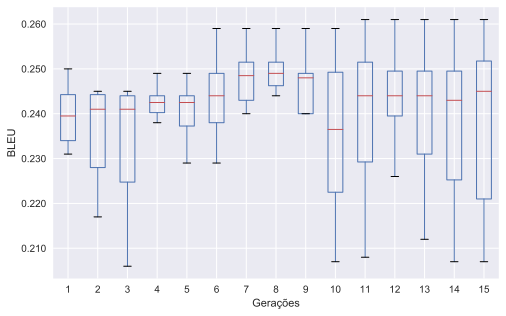

In [7]:
plt.figure();
bp = df.boxplot()
bp.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
bp.set_xlabel('Gerações')
bp.set_ylabel('BLEU')
plt.savefig('fig/boxplot.pdf')

In [11]:
df_bleu = pd.DataFrame(bleu)

1     0.250
2     0.245
3     0.245
4     0.249
5     0.249
6     0.259
7     0.259
8     0.259
9     0.259
10    0.259
11    0.261
12    0.261
13    0.261
14    0.261
15    0.261
dtype: float64

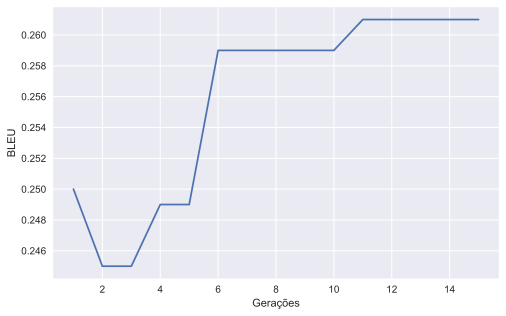

In [18]:
maiores = [x for x in df_bleu.agg(np.max)]
x = range(1, 16)
plt.figure();
plt.plot(x, maiores)
plt.xlabel('Gerações')
plt.ylabel('BLEU')
plt.savefig('fig/melhoresIndividuos.pdf')